# Wuzzaf Scrapping Data for ITs jobs Full pages
## Tasks :
- Collecting new jobs from the site (2021)
- merge the new data with the old data
- Perform a comprehensive analysis of the collected data

`By : Badieh Nader`

In [1]:
# Importing required liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import csv
import re
from functools import reduce
import seaborn as sb


## 2021 Data
- 2634  jobs found
- 132 pages

In [116]:
# Getting the urls 
x=list(range(132))
limit=2634
keys=0
urls=[]
for i in x:
    key=keys
    y = str(key)
    url='https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start='+y
    urls.append(url)
    keys+=20
    if key==limit:
        break

In [171]:
# scrap every page url and save the data in a file
f= open("wuzzaf_2021.csv","w",encoding='utf-8')
header = "job_URL,job_title,company_name,company_location,job_description\n"
f.write(header) 

for url in urls:
    print(url)    
    client=urlopen(url)
    html= client.read()
    client.close()
    soup = bs(html,"html.parser")
    containers = soup.find_all("div",{"class":"result-wrp row"}) 
    for container in containers:
        job_job = container.findAll("h2",{"class":"job-title"})
        job_title = job_job[0].text.strip()
        job_title = job_title.replace(',','-')
        
        
        job_link = container.findAll('a',{"class":"mobile-job-link"}, href=True)
        job_link = job_link[0]['href'].strip()
        
        company_name = container.findAll("span",{"class":"company-name"})
        company_name = company_name[0].text.strip()
        company_name = company_name.replace(',','-')
        
        company_location=container.findAll("span",{"class":"location location-desktop"})
        company_location = company_location[0].text.strip()
        company_location = company_location.replace(',','-')
        
        job_description = container.findAll("div",{"class":"job-details"})
        job_description = job_description[0].text.strip()
        job_description = ' '.join(job_description.split())
        job_description = job_description.replace(',','/')
        
        f.write(job_link+", "+job_title + ", " + company_name +", "+company_location + ", " + job_description + "\n ") 
            
            
f.close()

https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=0
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=20
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=40
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=60
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=80
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=100
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=120
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=140
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=160
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=180
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=200
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=220
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=240
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=260
https://wuzzuf.net/a/IT-Software-Develop

https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=2360
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=2380
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=2400
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=2420
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=2440
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=2460
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=2480
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=2500
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=2520
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=2540
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=2560
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=2580
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=2600
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=2620


In [2]:
# read the csv file with the 2021 data
df = pd.read_csv("wuzzaf_2021.csv")
df.head()

,job_URL,job_title,company_name,company_location,job_description
0,https://wuzzuf.net/jobs/p/1623d22c-3de2-455a-a...,Business Development Specialist - Upper Egypt,golden,- Aswan- Egypt,Full Time · Experienced · 2+ Yrs of Exp · Bus...
1,https://wuzzuf.net/jobs/p/0efb55cc-3264-47b4-...,Senior/Intermediate .NET Core Developer (Remo...,Confidential,- Cairo- Egypt,Full Time · Experienced · 4+ Yrs of Exp · Sof...
2,https://wuzzuf.net/jobs/p/d76caa63-bc76-4839-...,Senior Software Developer,Bnsights,- New Cairo- Cairo,Full Time · Experienced · 6-10 Yrs of Exp · S...
3,https://wuzzuf.net/jobs/p/2ffe3403-b147-4b38-...,Software Developer / Desktop Development,ITS,- Nasr City- Cairo,Full Time · Entry Level · 0-2 Yrs of Exp · Co...
4,https://wuzzuf.net/jobs/p/b6ae6a6a-47b8-47f7-...,Senior Software Developer -Dynamics 365...,CrossWorkers,- New Cairo- Cairo,Full Time · Experienced · 4-12 Yrs of Exp · A...


In [6]:
# add a job time column
job_time=[]
for value in df['job_description'] :
    if 'Full Time' in value :
        job_time.append('Full Time')
    elif 'Part Time' in value :
        job_time.append('Part Time')
    elif 'Internship' in value :
        job_time.append('Internship')
    else :
        job_time.append('Not defined')
    
df['job_time'] =job_time
df.head()

,job_URL,job_title,company_name,company_location,job_description,job_time
0,https://wuzzuf.net/jobs/p/1623d22c-3de2-455a-a...,Business Development Specialist - Upper Egypt,golden,- Aswan- Egypt,Full Time · Experienced · 2+ Yrs of Exp · Bus...,Full Time
1,https://wuzzuf.net/jobs/p/0efb55cc-3264-47b4-...,Senior/Intermediate .NET Core Developer (Remo...,Confidential,- Cairo- Egypt,Full Time · Experienced · 4+ Yrs of Exp · Sof...,Full Time
2,https://wuzzuf.net/jobs/p/d76caa63-bc76-4839-...,Senior Software Developer,Bnsights,- New Cairo- Cairo,Full Time · Experienced · 6-10 Yrs of Exp · S...,Full Time
3,https://wuzzuf.net/jobs/p/2ffe3403-b147-4b38-...,Software Developer / Desktop Development,ITS,- Nasr City- Cairo,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,Full Time
4,https://wuzzuf.net/jobs/p/b6ae6a6a-47b8-47f7-...,Senior Software Developer -Dynamics 365...,CrossWorkers,- New Cairo- Cairo,Full Time · Experienced · 4-12 Yrs of Exp · A...,Full Time


In [7]:
df.job_time.value_counts()

Full Time      2546
Internship       37
Part Time        32
Not defined      23
Name: job_time, dtype: int64

In [8]:
# add a job level column
job_level=[]
for value in df['job_description'] :
    if 'Experienced' in value :
        job_level.append('Experienced')
    elif 'Entry Level' in value :
        job_level.append('Entry Level')
    elif 'Internship' in value :
        job_level.append('Internship')
    else :
        job_level.append('Not defined')
    
df['job_level'] =job_level
df.head()

,job_URL,job_title,company_name,company_location,job_description,job_time,job_level
0,https://wuzzuf.net/jobs/p/1623d22c-3de2-455a-a...,Business Development Specialist - Upper Egypt,golden,- Aswan- Egypt,Full Time · Experienced · 2+ Yrs of Exp · Bus...,Full Time,Experienced
1,https://wuzzuf.net/jobs/p/0efb55cc-3264-47b4-...,Senior/Intermediate .NET Core Developer (Remo...,Confidential,- Cairo- Egypt,Full Time · Experienced · 4+ Yrs of Exp · Sof...,Full Time,Experienced
2,https://wuzzuf.net/jobs/p/d76caa63-bc76-4839-...,Senior Software Developer,Bnsights,- New Cairo- Cairo,Full Time · Experienced · 6-10 Yrs of Exp · S...,Full Time,Experienced
3,https://wuzzuf.net/jobs/p/2ffe3403-b147-4b38-...,Software Developer / Desktop Development,ITS,- Nasr City- Cairo,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,Full Time,Entry Level
4,https://wuzzuf.net/jobs/p/b6ae6a6a-47b8-47f7-...,Senior Software Developer -Dynamics 365...,CrossWorkers,- New Cairo- Cairo,Full Time · Experienced · 4-12 Yrs of Exp · A...,Full Time,Experienced


In [9]:
df.shape

(2638, 7)

In [10]:
# checking for nulls and duplicates
df.isna().sum() , df.duplicated().sum()

(job_URL             0
 job_title           0
 company_name        0
 company_location    0
 job_description     0
 job_time            0
 job_level           0
 dtype: int64,
 0)

### Cleaning and adjustments

In [19]:
#df.dropna(inplace=True)
#df.drop_duplicates(inplace=True)
df.head()

,job_URL,job_title,company_name,company_location,job_description
0,https://wuzzuf.net/jobs/p/1623d22c-3de2-455a-a...,Business Development Specialist - Upper Egypt,golden,- Aswan- Egypt,Full Time · Experienced · 2+ Yrs of Exp · Bus...
1,https://wuzzuf.net/jobs/p/0efb55cc-3264-47b4-...,Senior/Intermediate .NET Core Developer (Remo...,Confidential,- Cairo- Egypt,Full Time · Experienced · 4+ Yrs of Exp · Sof...
2,https://wuzzuf.net/jobs/p/d76caa63-bc76-4839-...,Senior Software Developer,Bnsights,- New Cairo- Cairo,Full Time · Experienced · 6-10 Yrs of Exp · S...
3,https://wuzzuf.net/jobs/p/2ffe3403-b147-4b38-...,Software Developer / Desktop Development,ITS,- Nasr City- Cairo,Full Time · Entry Level · 0-2 Yrs of Exp · Co...
4,https://wuzzuf.net/jobs/p/b6ae6a6a-47b8-47f7-...,Senior Software Developer -Dynamics 365...,CrossWorkers,- New Cairo- Cairo,Full Time · Experienced · 4-12 Yrs of Exp · A...


In [20]:
df.shape

(2638, 5)

## 2020 Data

In [34]:
# read the csv file with the 2020 data
df_old20 = pd.read_csv("wuzzaf_2020.csv")
df_old20.head()

,#PAGE_URL,title,company-name,job-link,job-link_link,short-description-,location
0,https://wuzzuf.net/a/IT-Software-Development-J...,Sales Supervisor - North Upper Egypt,PepsiCo International,Sales Supervisor - North Upper Egypt,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt"
1,https://wuzzuf.net/a/IT-Software-Development-J...,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Junior Technical Support Engineer - Upper Egypt,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt"
2,https://wuzzuf.net/a/IT-Software-Development-J...,Software Developer,Rednet It Services,Software Developer,https://wuzzuf.net/jobs/p/7f3aec8d-1724-4f0c-9...,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo"
3,https://wuzzuf.net/a/IT-Software-Development-J...,Senior Software Quality Control Engineer,Bnsights,Senior Software Quality Control Engineer,https://wuzzuf.net/jobs/p/bbc5d1cb-33ff-4c10-a...,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo"
4,https://wuzzuf.net/a/IT-Software-Development-J...,Senior E-Commerce Software Developer (Magento 2),shop4build,Senior E-Commerce Software Developer (Magento 2),https://wuzzuf.net/jobs/p/2be88ac7-5a6c-4a5a-8...,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo"


In [35]:
df_old20.columns

Index(['#PAGE_URL', 'title', 'company-name', 'job-link', 'job-link_link',
       'short-description-', 'location'],
      dtype='object')

In [36]:
# add a job time column
job_time=[]
for value in df_old20['short-description-'] :
    if 'Full Time' in value :
        job_time.append('Full Time')
    elif 'Part Time' in value :
        job_time.append('Part Time')
    elif 'Internship' in value :
        job_time.append('Internship')
    else :
        job_time.append('Not defined')
    
df_old20['job_time'] =job_time
df_old20.head()

,#PAGE_URL,title,company-name,job-link,job-link_link,short-description-,location,job_time
0,https://wuzzuf.net/a/IT-Software-Development-J...,Sales Supervisor - North Upper Egypt,PepsiCo International,Sales Supervisor - North Upper Egypt,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt",Full Time
1,https://wuzzuf.net/a/IT-Software-Development-J...,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Junior Technical Support Engineer - Upper Egypt,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt",Full Time
2,https://wuzzuf.net/a/IT-Software-Development-J...,Software Developer,Rednet It Services,Software Developer,https://wuzzuf.net/jobs/p/7f3aec8d-1724-4f0c-9...,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo",Full Time
3,https://wuzzuf.net/a/IT-Software-Development-J...,Senior Software Quality Control Engineer,Bnsights,Senior Software Quality Control Engineer,https://wuzzuf.net/jobs/p/bbc5d1cb-33ff-4c10-a...,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo",Full Time
4,https://wuzzuf.net/a/IT-Software-Development-J...,Senior E-Commerce Software Developer (Magento 2),shop4build,Senior E-Commerce Software Developer (Magento 2),https://wuzzuf.net/jobs/p/2be88ac7-5a6c-4a5a-8...,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo",Full Time


In [37]:
# add a job level column
job_level=[]
for value in df_old20['short-description-'] :
    if 'Experienced' in value :
        job_level.append('Experienced')
    elif 'Entry Level' in value :
        job_level.append('Entry Level')
    elif 'Internship' in value :
        job_level.append('Internship')
    else :
        job_level.append('Not defined')
    
df_old20['job_level'] =job_level
df_old20.head()

,#PAGE_URL,title,company-name,job-link,job-link_link,short-description-,location,job_time,job_level
0,https://wuzzuf.net/a/IT-Software-Development-J...,Sales Supervisor - North Upper Egypt,PepsiCo International,Sales Supervisor - North Upper Egypt,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt",Full Time,Not defined
1,https://wuzzuf.net/a/IT-Software-Development-J...,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Junior Technical Support Engineer - Upper Egypt,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt",Full Time,Entry Level
2,https://wuzzuf.net/a/IT-Software-Development-J...,Software Developer,Rednet It Services,Software Developer,https://wuzzuf.net/jobs/p/7f3aec8d-1724-4f0c-9...,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo",Full Time,Experienced
3,https://wuzzuf.net/a/IT-Software-Development-J...,Senior Software Quality Control Engineer,Bnsights,Senior Software Quality Control Engineer,https://wuzzuf.net/jobs/p/bbc5d1cb-33ff-4c10-a...,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo",Full Time,Experienced
4,https://wuzzuf.net/a/IT-Software-Development-J...,Senior E-Commerce Software Developer (Magento 2),shop4build,Senior E-Commerce Software Developer (Magento 2),https://wuzzuf.net/jobs/p/2be88ac7-5a6c-4a5a-8...,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo",Full Time,Experienced


In [38]:
df_old20.shape

(2580, 9)

In [39]:
# check for null
df_old20.isna().sum()

#PAGE_URL             0
title                 0
company-name          0
job-link              0
job-link_link         0
short-description-    0
location              0
job_time              0
job_level             0
dtype: int64

In [40]:
#check for duplicates
df_old20.duplicated().sum()

20

### Cleaning and adjustments

In [41]:
df_old20.drop(['#PAGE_URL','job-link'],axis=1 , inplace=True)
df_old20.rename(columns={'title': 'job_title', 'company-name': 'company_name', 'job-link_link': 'job_URL', 'short-description-': 'job_description', 'location': 'company_location'} , inplace=True)
#df_old20.dropna(inplace=True)
df_old20.drop_duplicates(inplace=True)
df_old20.head()

,job_title,company_name,job_URL,job_description,company_location,job_time,job_level
0,Sales Supervisor - North Upper Egypt,PepsiCo International,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt",Full Time,Not defined
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt",Full Time,Entry Level
2,Software Developer,Rednet It Services,https://wuzzuf.net/jobs/p/7f3aec8d-1724-4f0c-9...,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo",Full Time,Experienced
3,Senior Software Quality Control Engineer,Bnsights,https://wuzzuf.net/jobs/p/bbc5d1cb-33ff-4c10-a...,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo",Full Time,Experienced
4,Senior E-Commerce Software Developer (Magento 2),shop4build,https://wuzzuf.net/jobs/p/2be88ac7-5a6c-4a5a-8...,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo",Full Time,Experienced


In [42]:
df_old20.head()

,job_title,company_name,job_URL,job_description,company_location,job_time,job_level
0,Sales Supervisor - North Upper Egypt,PepsiCo International,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt",Full Time,Not defined
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt",Full Time,Entry Level
2,Software Developer,Rednet It Services,https://wuzzuf.net/jobs/p/7f3aec8d-1724-4f0c-9...,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo",Full Time,Experienced
3,Senior Software Quality Control Engineer,Bnsights,https://wuzzuf.net/jobs/p/bbc5d1cb-33ff-4c10-a...,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo",Full Time,Experienced
4,Senior E-Commerce Software Developer (Magento 2),shop4build,https://wuzzuf.net/jobs/p/2be88ac7-5a6c-4a5a-8...,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo",Full Time,Experienced


## 2014 to 2016 Data

In [90]:
# read the csv file with the 2014 to 2016 data
df_old16 = pd.read_csv("Wuzzuf14-16.csv" , skiprows=range(1,2))
df_old16.head()

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency
0,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,1000.0,5000.0,8.0,Entry Level,0-2,1/1/2014 20:01,2213.0,<p>&bull;Placing jobs' ads on various websites...,NaN,Per Month,Egyptian Pound
1,7226ce78,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,2000.0,2500.0,1.0,Entry Level,2,1/2/2014 11:01,2940.0,"<span style=""text-decoration: underline;""><str...",NaN,Per Month,Egyptian Pound
2,f4b2bcd6,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,2000.0,3500.0,1.0,Entry Level,2-Jan,1/2/2014 12:01,2042.0,"<strong><span style=""text-decoration: underlin...",NaN,Per Month,Egyptian Pound
3,3fee6f73,Alexandria,Electrical Maintenance Engineer,Engineering,Select,Select,Food and Beverage Production,Select,Select,5000.0,8000.0,1.0,Experienced (Non-Manager),3-Jan,1/21/2014 13:45,5684.0,Job Title: Electrical Maintenance Engineer<br ...,NaN,Per Month,Egyptian Pound
4,22eb5fcb,Cairo,IT Adminstrator,IT/Software Development,Select,Select,Retail,Select,Select,3000.0,5000.0,1.0,Manager,5-Mar,1/2/2014 17:00,1644.0,&bull; Maintain the IT Retail Management Syste...,NaN,Per Month,Egyptian Pound


In [91]:
df_old16.rename(columns={'career_level': 'job_level'} , inplace=True)

In [92]:
df_old16.shape

(21921, 20)

### Cleaning and adjustments

In [93]:
df_old16.drop(['id','job_category1' ,'job_category2','job_category3','job_industry1',
               'job_industry2','job_industry3','salary_minimum','salary_maximum',
              'num_vacancies','experience_years','post_date','views',
              'job_requirements','payment_period','currency'],axis=1 , inplace=True)
df_old16.drop(0 ,inplace=True)
df_old16.rename(columns={'city': 'company_location'} , inplace=True)
df_old16.dropna(inplace=True)
df_old16.drop_duplicates(inplace=True)
df_old16.head()

,company_location,job_title,job_level,job_description
1,Cairo,Junior Software Developer,Entry Level,"<span style=""text-decoration: underline;""><str..."
2,Cairo,Application Support Engineer,Entry Level,"<strong><span style=""text-decoration: underlin..."
3,Alexandria,Electrical Maintenance Engineer,Experienced (Non-Manager),Job Title: Electrical Maintenance Engineer<br ...
4,Cairo,IT Adminstrator,Manager,&bull; Maintain the IT Retail Management Syste...
5,6 th of October city,e-payments System Administrator,Experienced (Non-Manager),<p>1-Configure and Archive Data for the banks ...


In [94]:
df_old20.columns

Index(['job_title', 'company_name', 'job_URL', 'job_description',
       'company_location', 'job_time', 'job_level'],
      dtype='object')

## Merging all the data

In [95]:
result = df.append([df,df_old20, df_old16])
result.head()

,job_URL,job_title,company_name,company_location,job_description,job_time,job_level
0,https://wuzzuf.net/jobs/p/1623d22c-3de2-455a-a...,Business Development Specialist - Upper Egypt,golden,- Aswan- Egypt,Full Time · Experienced · 2+ Yrs of Exp · Bus...,Full Time,Experienced
1,https://wuzzuf.net/jobs/p/0efb55cc-3264-47b4-...,Senior/Intermediate .NET Core Developer (Remo...,Confidential,- Cairo- Egypt,Full Time · Experienced · 4+ Yrs of Exp · Sof...,Full Time,Experienced
2,https://wuzzuf.net/jobs/p/d76caa63-bc76-4839-...,Senior Software Developer,Bnsights,- New Cairo- Cairo,Full Time · Experienced · 6-10 Yrs of Exp · S...,Full Time,Experienced
3,https://wuzzuf.net/jobs/p/2ffe3403-b147-4b38-...,Software Developer / Desktop Development,ITS,- Nasr City- Cairo,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,Full Time,Entry Level
4,https://wuzzuf.net/jobs/p/b6ae6a6a-47b8-47f7-...,Senior Software Developer -Dynamics 365...,CrossWorkers,- New Cairo- Cairo,Full Time · Experienced · 4-12 Yrs of Exp · A...,Full Time,Experienced


In [96]:
result.shape

(20607, 7)

In [97]:
# check for null
result.isna().sum()

job_URL             12771
job_title               0
company_name        12771
company_location        0
job_description         0
job_time            12771
job_level               0
dtype: int64

In [98]:
#check for duplicates
result.duplicated().sum()

2638

### Cleaning and adjustments

In [99]:
#result.dropna(inplace=True)
result.drop_duplicates(inplace=True)

In [100]:
result.shape

(17969, 7)

## Analysis

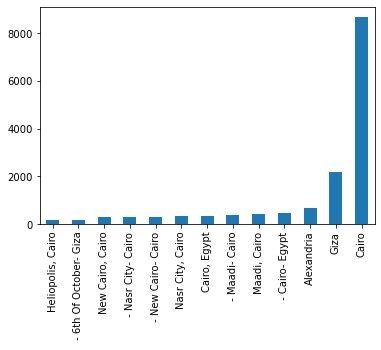

In [101]:
result.company_location.value_counts().sort_values(ascending=False)[12::-1].plot(kind = 'bar');

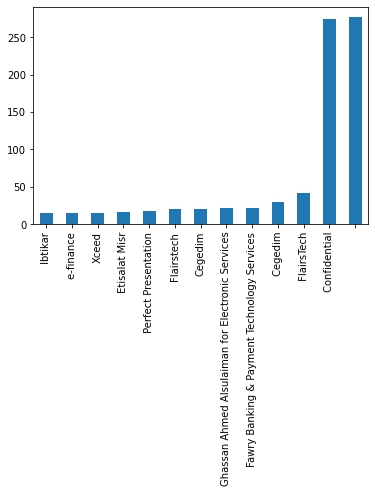

In [102]:
result.company_name.value_counts().sort_values(ascending=False)[12::-1].plot(kind = 'bar');

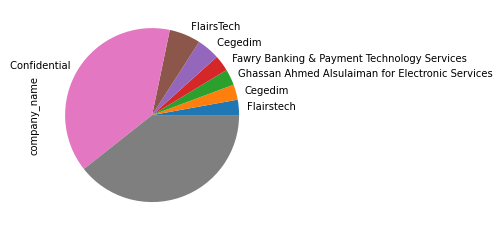

In [103]:
result.company_name.value_counts().sort_values(ascending=False)[7::-1].plot(kind ='pie');

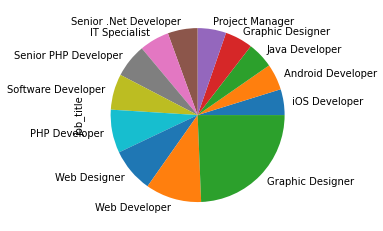

In [104]:
result.job_title.value_counts().sort_values(ascending=False)[12::-1].plot(kind ='pie');

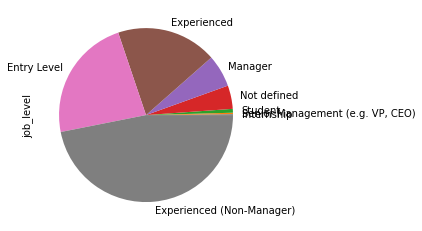

In [106]:
result.job_level.value_counts().sort_values(ascending=False)[10::-1].plot(kind ='pie');

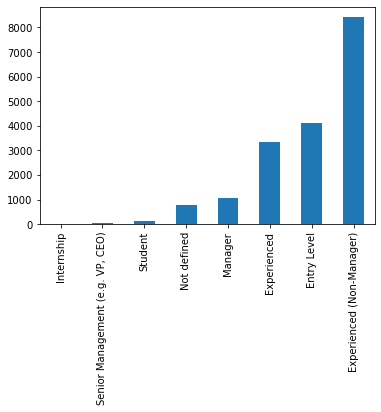

In [107]:
result.job_level.value_counts().sort_values(ascending=False)[12::-1].plot(kind = 'bar');